In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Q1

In [4]:
#a

In [5]:
df1 = pd.read_csv("201803-fordgobike-tripdata.csv")
df2 = pd.read_csv("201807-fordgobike-tripdata.csv")
df3 = pd.read_csv("201811-fordgobike-tripdata.csv")
df4 = pd.read_csv("201812-fordgobike-tripdata.csv")
df = pd.concat([df1,df2,df3,df4], ignore_index=True)
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No
5,281,2018-03-31 23:58:07.8050,2018-04-01 00:02:49.3590,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,200.0,2nd Ave at E 18th St,37.800214,-122.253810,777,Subscriber,1991.0,Male,No
6,896,2018-03-31 23:47:48.7970,2018-04-01 00:02:45.5380,98.0,Valencia St at 16th St,37.765052,-122.421866,52.0,McAllister St at Baker St,37.777416,-122.441838,3624,Customer,1970.0,Male,No
7,440,2018-03-31 23:51:17.8000,2018-03-31 23:58:38.7120,11.0,Davis St at Jackson St,37.797280,-122.398436,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2410,Subscriber,1979.0,Female,Yes
8,169,2018-03-31 23:50:43.8140,2018-03-31 23:53:33.5710,316.0,San Salvador St at 1st St,37.330165,-121.885831,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,1925,Subscriber,1957.0,Male,No
9,2765,2018-03-31 23:03:50.0160,2018-03-31 23:49:55.3190,318.0,San Carlos St at Market St,37.330698,-121.888979,318.0,San Carlos St at Market St,37.330698,-121.888979,1191,Customer,1981.0,Male,No


In [6]:
#b

Average duration 834.4304272507298


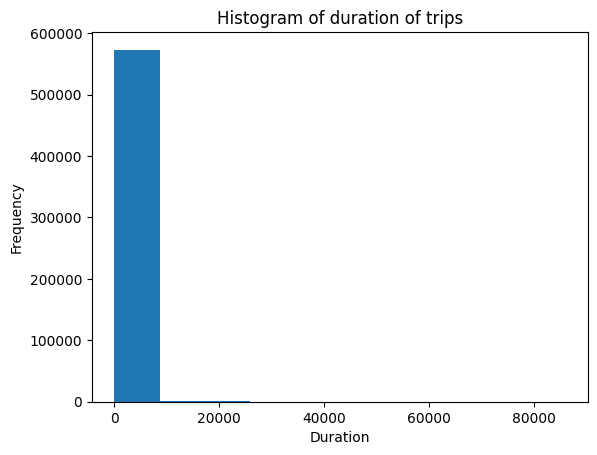

In [7]:
print("Average duration",df['duration_sec'].mean())
plt.hist(df['duration_sec'],bins=10);
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram of duration of trips")
plt.show()

From plot it is observerd that most of the trips have duration less than 1000. Hence, the average of trip duration is between (500,1000).

In [8]:
#c

correlation between the months and the trip duration -0.0235953147374796


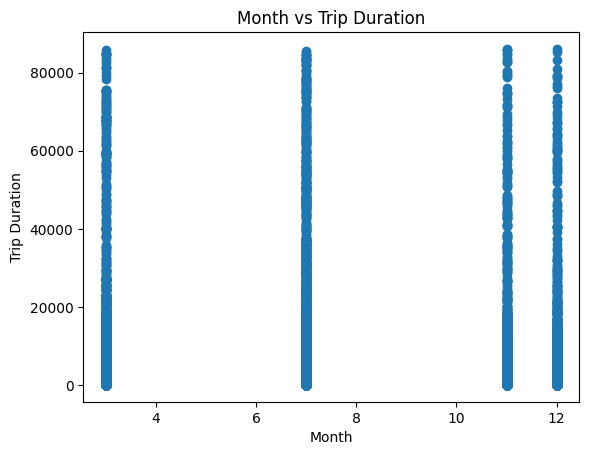

In [9]:
month = pd.to_datetime(df["start_time"]).dt.month
print("correlation between the months and the trip duration",df["duration_sec"].corr(month))
plt.scatter(month,df["duration_sec"])
plt.xlabel("Month")
plt.ylabel("Trip Duration")
plt.title("Month vs Trip Duration")
plt.show()

From the scatter plot, it can be seen that trip duration is independent of month. It is also validated from the correlation value which is very small.

In [10]:
#d

correlation between the season and the trip duration -0.0058992256873561955


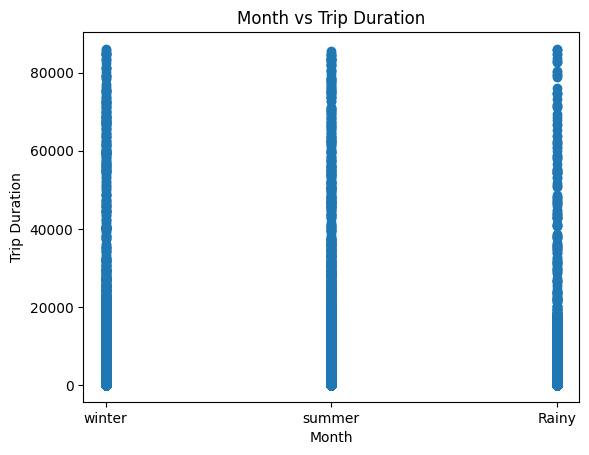

In [11]:
season = month.map(lambda x : 1 if (x<=3 or x==12) else  2 if(x<=7) else 3) # 1 is winter, 2 for summer, 3 for Rainy
print("correlation between the season and the trip duration",df["duration_sec"].corr(season))
plt.scatter(season,df["duration_sec"])
plt.xlabel("Month")
plt.ylabel("Trip Duration")
plt.title("Month vs Trip Duration")
plt.xticks([1,2,3],["winter","summer","Rainy"])
plt.show()

No correlatin between season and trip duration as correlation value is negligible

In [12]:
#e

data <bound method NDFrame.head of         user_type  duration_sec member_gender
5               1           281          Male
7               1           440        Female
8               1           169          Male
11              1           511        Female
12              1           419          Male
...           ...           ...           ...
576095          1           498          Male
576097          1           473        Female
576099          1           260          Male
576100          1           292          Male
576101          1           150           NaN

[411511 rows x 3 columns]>
correlation between the season and the trip duration 0.11373924421298295


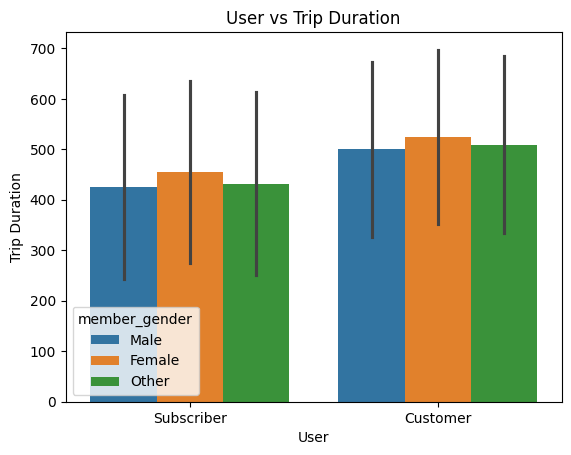

In [13]:
user = df["user_type"].map(lambda x : 1 if (x=="Subscriber") else  2) # 1 for Subscriber, 2 for Customer
df_user = pd.concat([user,df["duration_sec"],df["member_gender"]],axis=1)
df_user = df_user[df["duration_sec"]<=800] #Assume duration <800 is short trip
print("data",df_user.head)
print("correlation between the season and the trip duration",df_user["duration_sec"].corr(df_user["user_type"]))
sns.barplot(data=df_user,x="user_type",y="duration_sec",hue="member_gender",errorbar= "sd")
plt.xlabel("User")
plt.ylabel("Trip Duration")
plt.title("User vs Trip Duration")
plt.xticks([0,1],["Subscriber","Customer"])
plt.show()

From graph it is evident that there is no correlation between user type and duration of trip which is again verified by very small value of correlation coefficient. 

In [14]:
#Q2

In [15]:
#a

In [16]:
matrix = np.arange(0,1,0.01).reshape(10,10)
matrix

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
       [0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29],
       [0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39],
       [0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49],
       [0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59],
       [0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69],
       [0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79],
       [0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89],
       [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]])

In [17]:
#b

In [18]:
matrix =np.linspace(0,1,20)
matrix

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [19]:
#c

In [20]:
matrix = np.arange(1,26).reshape(5,5)
print("Sum of all elements of matrix = ",matrix.sum())
print("SD of all elements of matrix = ",matrix.std())
print("Sum of all elements of matrix of a column= ",matrix.sum(axis=0))

Sum of all elements of matrix =  325
SD of all elements of matrix =  7.211102550927978
Sum of all elements of matrix of a column=  [55 60 65 70 75]


In [21]:
#Q3

In [22]:
x= np.arange(0,100)
y=x*2
z=x**2

In [23]:
#a

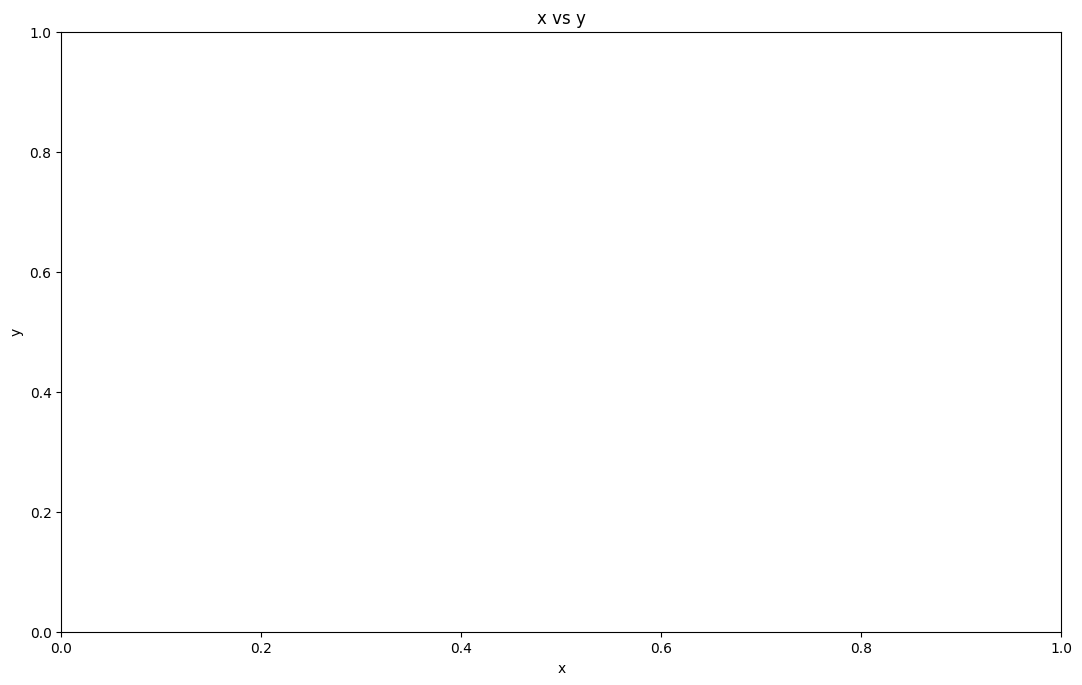

In [24]:
fig = plt.figure(figsize=(10,6))
axes1 = fig.add_axes([0,0,1,1])
axes1.set_xlabel("x")
axes1.set_ylabel("y")
axes1.set_title("x vs y")
plt.show()

In [25]:
#b

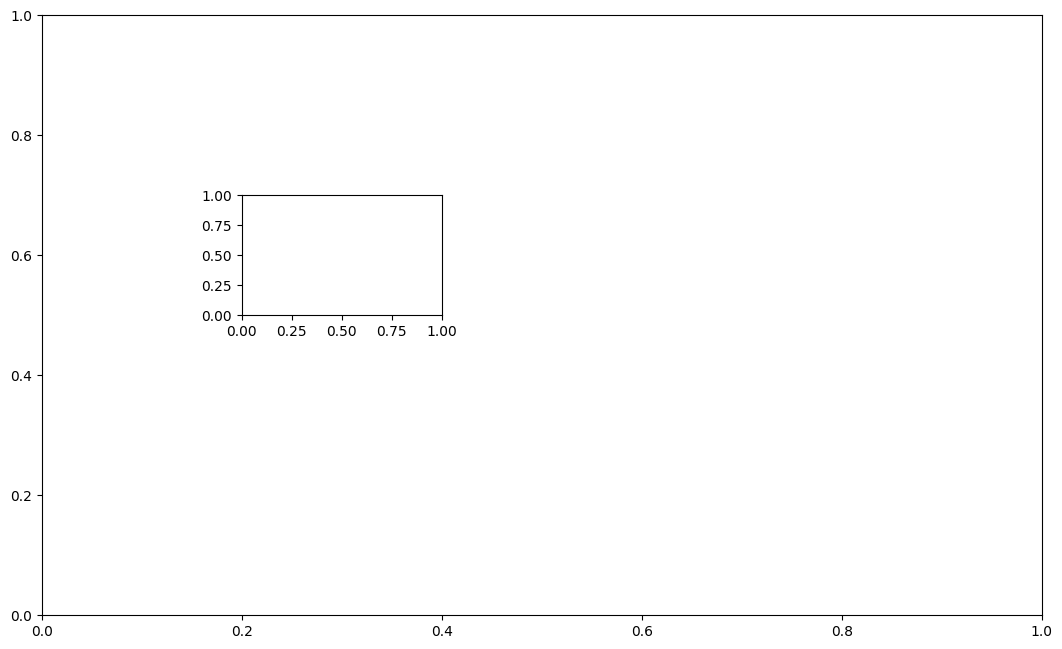

In [26]:
fig = plt.figure(figsize=(10,6))
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0.2,0.5,0.2,0.2])

In [27]:
#c

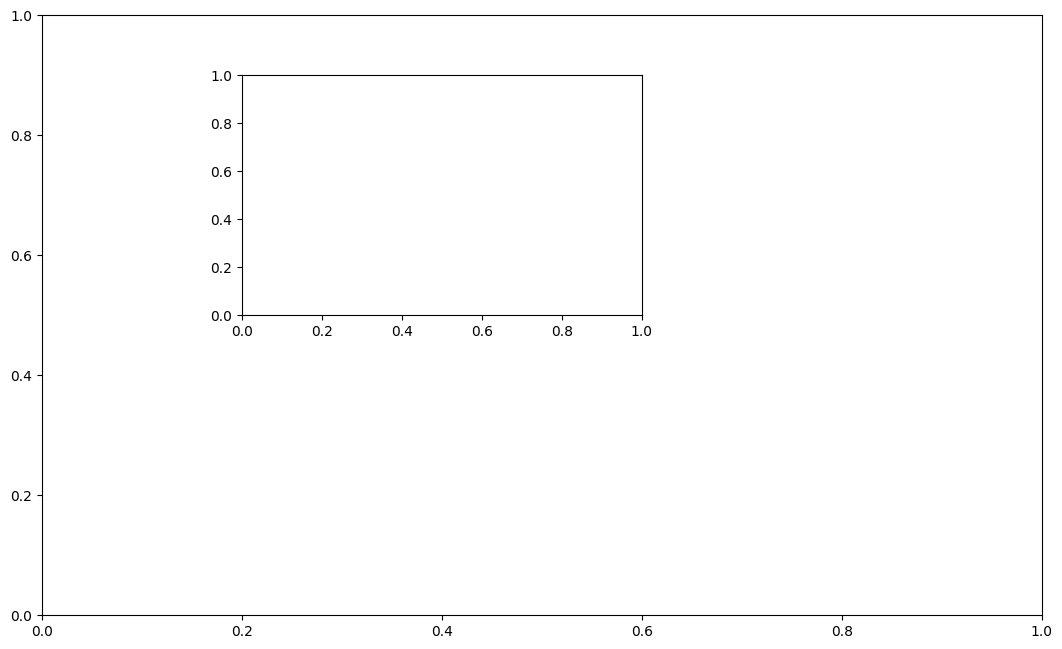

In [28]:
fig = plt.figure(figsize=(10,6))
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0.2,0.5,0.4,0.4])

In [29]:
#d

(30.0, 50.0)

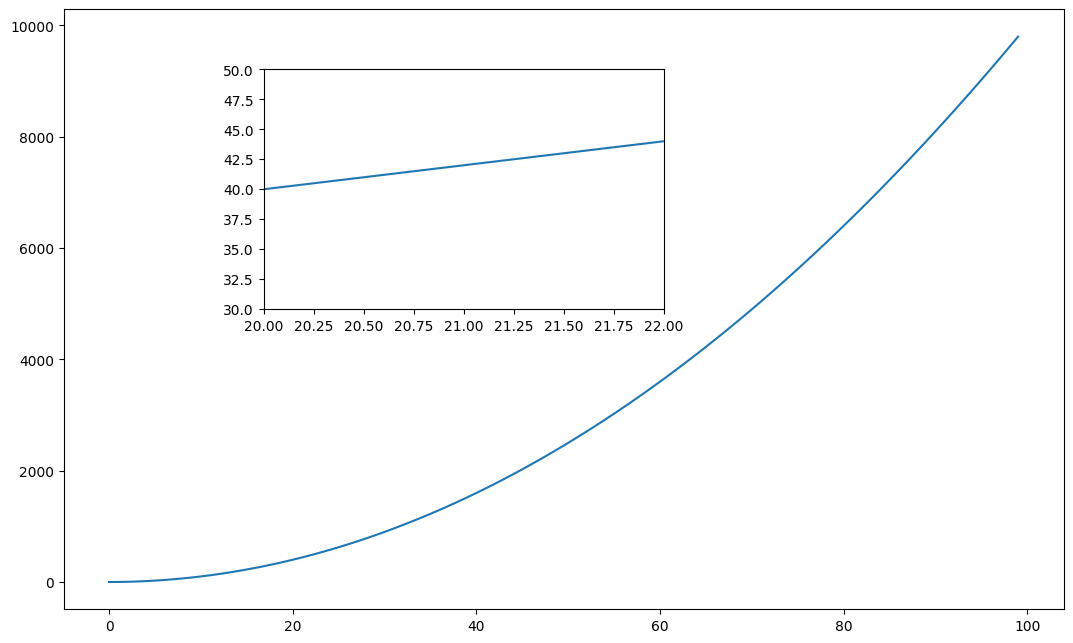

In [30]:
fig = plt.figure(figsize=(10,6))
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0.2,0.5,0.4,0.4])
axes1.plot(x,z)
axes2.plot(x,y)
axes2.set_xlim(20,22)
axes2.set_ylim(30,50)

In [31]:
#Q4

In [32]:
df = pd.read_csv("walmart_purchase_data.csv")
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84


In [33]:
#a

In [34]:
print("Average Purchase Price - ",df["Purchase Price"].mean())

Average Purchase Price -  50.347302


In [35]:
#b

In [36]:
print("Maximum Purchase Price - ",df["Purchase Price"].max())
print("Minimum Purchase Price - ",df["Purchase Price"].min())

Maximum Purchase Price -  99.99
Minimum Purchase Price -  0.0


In [37]:
#c

In [38]:
print(" Number of people have English 'en' as their Language of choice - ",(~df["Language"].ne("en")).sum())

 Number of people have English 'en' as their Language of choice -  1098


In [39]:
#d

In [40]:
print("email of the person with the following Credit Card Number: 4926535242672853 - ",df["Email"][df["Credit Card"]==4926535242672853])

email of the person with the following Credit Card Number: 4926535242672853 -  1234    bondellen@williams-garza.com
Name: Email, dtype: object


In [41]:
#e

In [42]:
print("Purchase Price for this transaction from Lot: 90 WT - ",np.array(df["Purchase Price"][df["Lot"]==("90 WT")])[0])

Purchase Price for this transaction from Lot: 90 WT -  75.1


In [43]:
#f

In [44]:
print("people have American Express as their Credit Card Provider and made a purchase above $95 - ",((df["CC Provider"]=="American Express") & (df["Purchase Price"]>95)).sum())

people have American Express as their Credit Card Provider and made a purchase above $95 -  39


In [45]:
#g

In [46]:
print("Number people have a credit card that expires in 2025- ",(df["CC Exp Date"].str.endswith("25")).sum())


Number people have a credit card that expires in 2025-  1033


In [47]:
#h

In [48]:
print("5 most popular email providers - \n",pd.Series(map(lambda x : x.split("@")[1],df["Email"])).value_counts().head(5))

5 most popular email providers - 
 hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64


In [49]:
#i

In [50]:
print("5 most common job titles\n ",df["Job"].value_counts().head(5))

5 most common job titles
  Job
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: count, dtype: int64


In [51]:
#j

In [52]:
print("Purchase Time\n ",df["AM or PM"].value_counts().head(5))

Purchase Time
  AM or PM
PM    5068
AM    4932
Name: count, dtype: int64
